# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

In this document we reperform some of the analysis provided in 
*Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 and available at http://www.jstor.org/stable/2290069. 

On the fourth page of this article, they indicate that the maximum likelihood estimates of the logistic regression using only temperature are: $\hat{\alpha}=5.085$ and $\hat{\beta}=-0.1156$ and their asymptotic standard errors are $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$. The Goodness of fit indicated for this model was $G^2=18.086$ with 21 degrees of freedom. Our goal is to reproduce the computation behind these values and the Figure 4 of this article, possibly in a nicer looking way.

## Technical information on the computer on which the analysis is run

We will be using the python3 language using the pandas, statsmodels, numpy, matplotlib and seaborn libraries.

In [1]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns = None  # seaborn not available in this environment


print_sys_info()
print_imported_modules()

3.13.2 (main, Oct 20 2025, 18:07:39) [Clang 21.0.0git (https:/github.com/llvm/llvm-project 2f05451198e2f222ec66cec489
uname_result(system='Emscripten', node='emscripten', release='4.0.9', version='#1', machine='wasm32')
IPython 9.0.2
IPython.core.release 9.0.2
IPython.external.pickleshare 0.7.5
PIL 11.3.0
PIL.Image 11.3.0
PIL._deprecate 11.3.0
PIL._version 11.3.0
_ctypes 1.1.0
_decimal 1.70
argparse 1.1
comm 0.2.3
csv 1.0
ctypes 1.1.0
cycler 0.12.1
dateutil 2.9.0.post0
dateutil._version 2.9.0.post0
decimal 1.70
decorator 5.2.1
executing 2.2.0
executing.version 2.2.0
ipaddress 1.0
jedi 0.19.2
json 2.0.9
kiwisolver 1.4.8
kiwisolver._cext 1.4.8
logging 0.5.1.2
matplotlib 3.8.4
matplotlib._version 3.8.4
micropip 0.11.0
micropip._vendored.packaging.src.packaging 24.2
micropip._version 0.11.0
numpy 2.2.5
numpy._core 2.2.5
numpy._core._multiarray_umath 3.1


<ipython-input-1-4e2079048fa1>:4: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.__version__.
  if(hasattr(val, '__version__')):
<ipython-input-1-4e2079048fa1>:5: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you ar

numpy.core 2.2.5
numpy.f2py <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.auxfuncs <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.capi_maps <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.cb_rules <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.cfuncs <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.common_rules <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.crackfortran <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.f2py2e <module 'numpy.f2py.__version__' from '/lib/python3.13/site-packages/numpy/f2py/__version__.py'>
numpy.f2py.f90mod_rules  1.27 
numpy.f2py.rules <mo

## Loading and inspecting data
Let's start by reading data.

In [7]:
import os
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir(".")[:50])


Current working directory: /drive
Files here: ['Untitled.ipynb', 'data_shuttle.csv', 'src_Python3_challenger__1_.ipynb', 'README.md', 'data', 'notebooks']


In [8]:
data = pd.read_csv("data_shuttle.csv")

data

Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

We know from our previous experience on this data set that filtering data is a really bad idea. We will therefore process it as such.

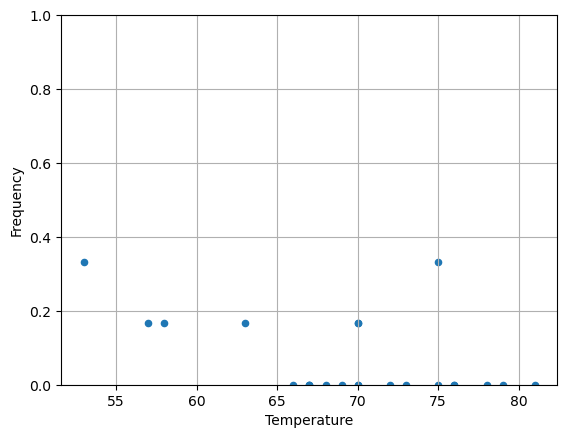

In [9]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

## Logistic regression

Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [13]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel = sm.GLM(
    data['Frequency'],
    data[['Intercept','Temperature']],
    family=sm.families.Binomial(link=sm.families.links.logit())
).fit()


logmodel.summary()

/lib/python3.13/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Fri, 19 Dec 2025   Deviance:                       3.0144
Time:                        22:15:03   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

The maximum likelyhood estimator of the intercept and of Temperature are thus $\hat{\alpha}=5.0849$ and $\hat{\beta}=-0.1156$. This **corresponds** to the values from the article of Dalal *et al.* The standard errors are $s_{\hat{\alpha}} = 7.477$ and $s_{\hat{\beta}} = 0.115$, which is **different** from the $3.052$ and $0.04702$ reported by Dallal *et al.* The deviance is $3.01444$ with 21 degrees of freedom. I cannot find any value similar to the Goodness of fit ($G^2=18.086$) reported by Dalal *et al.* There seems to be something wrong. Oh I know, I haven't indicated that my observations are actually the result of 6 observations for each rocket launch. Let's indicate these weights (since the weights are always the same throughout all experiments, it does not change the estimates of the fit but it does influence the variance estimates).

In [15]:
logmodel = sm.GLM(
    data['Frequency'],
    data[['Intercept','Temperature']],
    family=sm.families.Binomial(link=sm.families.links.Logit()),
    var_weights=data['Count']
).fit()


logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Fri, 19 Dec 2025   Deviance:                       18.086
Time:                        22:16:08   Pearson chi2:                     30.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2344
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

Good, now I have recovered the asymptotic standard errors $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$.
The Goodness of fit (Deviance) indicated for this model is $G^2=18.086$ with 21 degrees of freedom (Df Residuals).

**I have therefore managed to fully replicate the results of the Dalal *et al.* article**.

## Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model.:

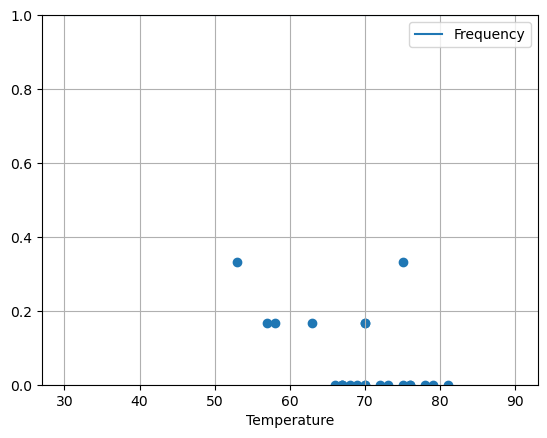

In [16]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred)
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

This figure is very similar to the Figure 4 of Dalal *et al.* **I have managed to replicate the Figure 4 of the Dalal *et al.* article.**

## Computing and plotting uncertainty

Following the documentation of [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), I use regplot.

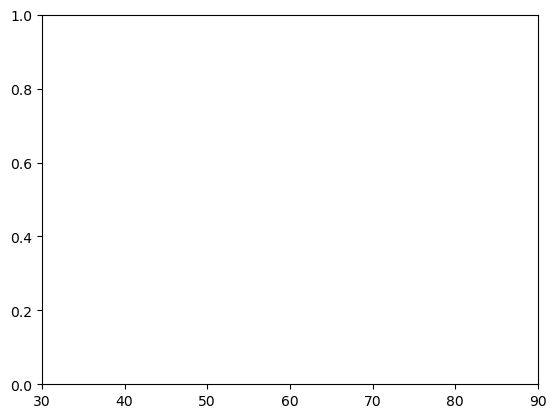

In [20]:
#sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
#sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**I think I have managed to correctly compute and plot the uncertainty of my prediction.** Although the shaded area seems very similar to [the one obtained by with R](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/tree/master/challenger.pdf), I can spot a few differences (e.g., the blue point for temperature 63 is outside)... Could this be a numerical error ? Or a difference in the statistical method ? It is not clear which one is "right".

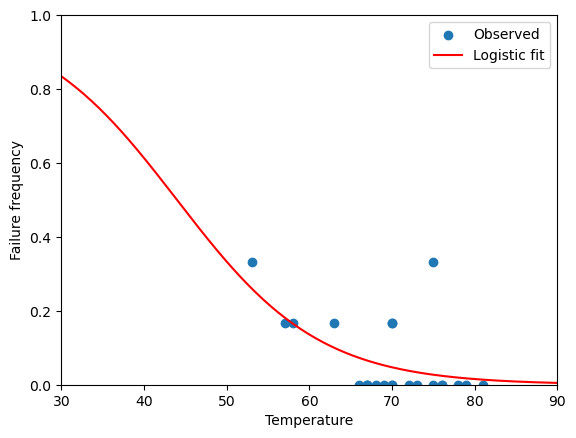

In [21]:
import numpy as np

# Scatter plot of observed frequencies
plt.scatter(data['Temperature'], data['Frequency'], label="Observed")

# Logistic curve from the fitted model
x = np.linspace(30, 90, 200)
X = np.column_stack([np.ones_like(x), x])
y = logmodel.predict(X)

plt.plot(x, y, color='red', label="Logistic fit")

plt.xlabel("Temperature")
plt.ylabel("Failure frequency")
plt.xlim(30, 90)
plt.ylim(0, 1)
plt.legend()
plt.show()


In [22]:
import sys, platform
import numpy as np
import pandas as pd
import matplotlib
import statsmodels

print("=== SYSTEM ===")
print("OS:", platform.platform())
print("Python:", sys.version.split()[0])

print("\n=== LIB VERSIONS ===")
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("statsmodels:", statsmodels.__version__)

print("\n=== MODEL RESULTS (GLM Binomial Logit) ===")
print("params:\n", logmodel.params)
print("\nstd errors:\n", logmodel.bse)
print("\nAIC:", logmodel.aic)
print("Deviance:", logmodel.deviance)
print("Null deviance:", logmodel.null_deviance)


=== SYSTEM ===
OS: Emscripten-4.0.9-wasm32-32bit
Python: 3.13.2

=== LIB VERSIONS ===
numpy: 2.2.5
pandas: 2.3.2
matplotlib: 3.8.4
statsmodels: 0.14.4

=== MODEL RESULTS (GLM Binomial Logit) ===
params:
 Intercept      5.084977
Temperature   -0.115601
dtype: float64

std errors:
 Intercept      3.052484
Temperature    0.047024
dtype: float64

AIC: 51.051946343967785
Deviance: 18.086326742497448
Null deviance: 24.230361814971374
